# Post pruning decision trees with cost complexity pruning

Using the module sklearn.tree 

The :class:DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. The cost complexity pruning is another option to control the size of a tree to prevent overfitting. 

In :class:DecisionTreeClassifier, cost complexity pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater the values of ccp_alpha greater the number of pruned nodes. 

Here we see the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.




In [1]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
x, y = load_breast_cancer(return_X_y=True)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
clf_model = DecisionTreeClassifier(random_state=0)
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [6]:
pred=clf_model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8811188811188811

[Text(624.4285714285714, 770.1, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(398.5714285714286, 679.5, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(265.7142857142857, 588.9, 'X[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(159.42857142857144, 498.3, 'X[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(106.28571428571429, 407.7, 'X[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(53.142857142857146, 317.1, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(159.42857142857144, 317.1, 'X[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(106.28571428571429, 226.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(212.57142857142858, 226.5, 'X[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(159.42857142857144, 135.89999999999998, 'X[1] <= 22.385\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(106.28571428571429, 45.30000000000007, 'gi

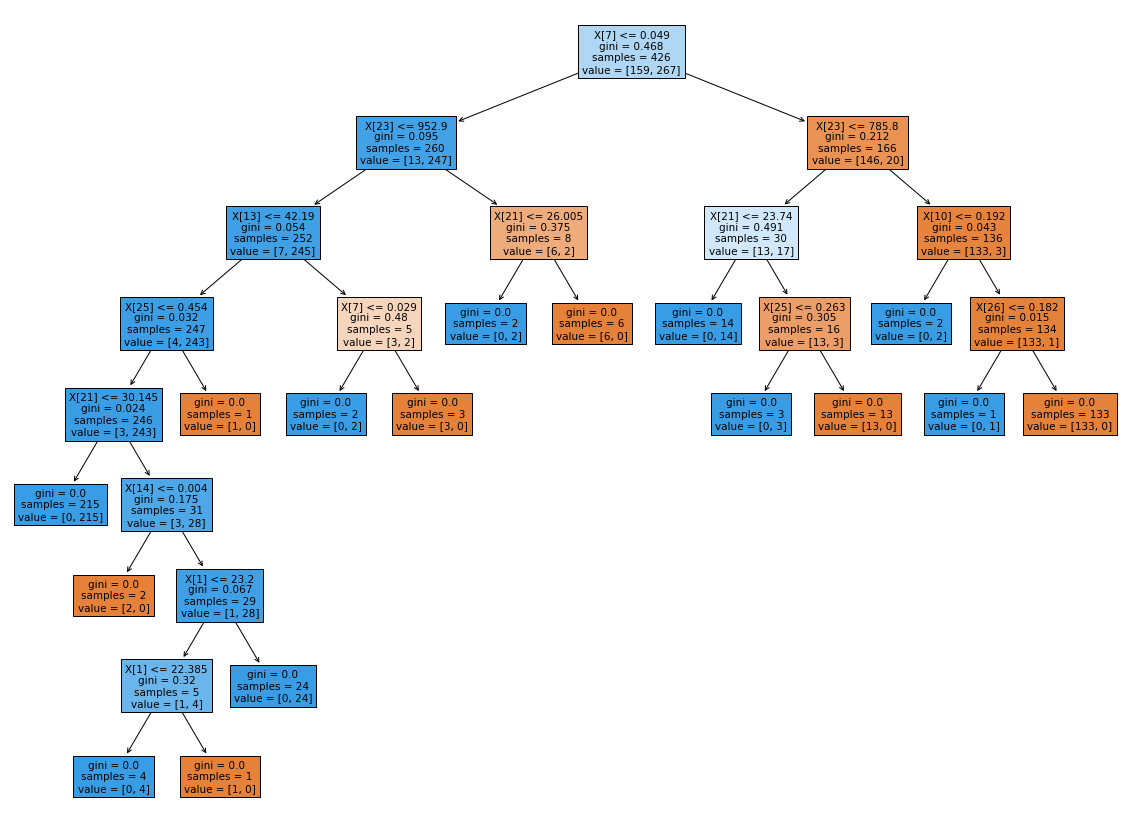

In [7]:
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(clf_model,filled=True)

In [ ]:
path = clf_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

 ## checking the number of nodes in tree with ccp_alpha

In [17]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


Here we see the the number of nodes and the depth of the tree decreases with the increase in ccp_alpha value.

The last cls and ccp_alpha value gives a  trivial tree only with one node. Therefore we can remove this.

# Accuracy vs alpha for training and testing sets


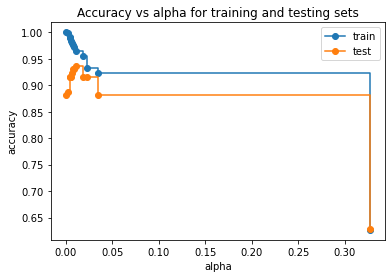

In [18]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

When ccp_alpha is set to zero and keeping the other default parameters of :class:DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy.
with the increasing values of alpha, the more number of the tree gets pruned, and creates a decision tree that generalizes better.

In this example, from  the accuracy vs alpha for train and test set we can see that setting ccp_alpha=0.015 maximizes the testing accuracy.


In [19]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.012)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.012, random_state=0)

In [20]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9370629370629371

[Text(418.5, 475.65000000000003, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(209.25, 339.75, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(104.625, 203.85000000000002, 'gini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(313.875, 203.85000000000002, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(627.75, 339.75, 'X[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(523.125, 203.85000000000002, 'X[21] <= 23.74\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(418.5, 67.94999999999999, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(627.75, 67.94999999999999, 'gini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(732.375, 203.85000000000002, 'gini = 0.043\nsamples = 136\nvalue = [133, 3]')]

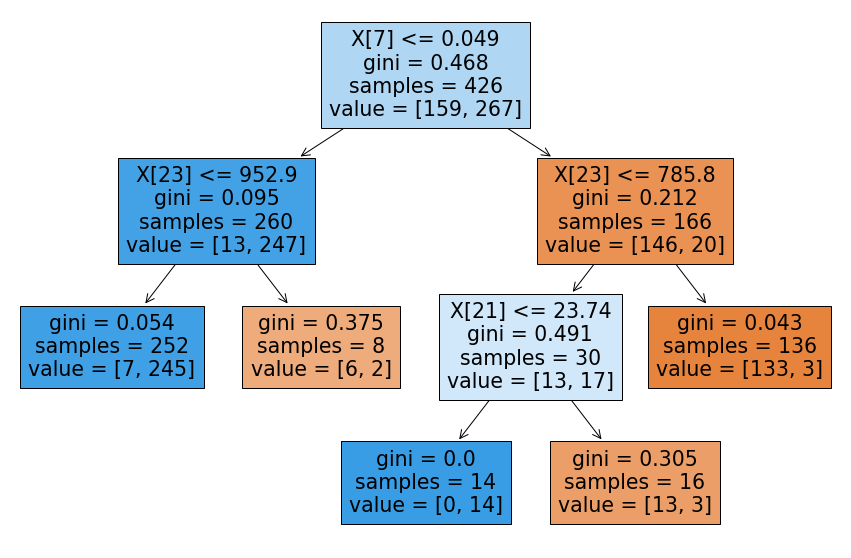

In [21]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)